In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import linalg as LA

In [2]:
def f(x,y):
    return x*math.sqrt(y)

In [20]:
N = 1001
h = 1/(N-1)
x = np.arange(0,1+h,h)
y = np.zeros((2,N))

In [21]:
alpha_min = 0
alpha_max = 2

In [33]:
def solve(x,y,h,N):
    for i in range(1,N):
        y[0][i] = y[0][i-1] + h*y[1][i-1]
        y[1][i] = y[1][i-1] + h*x[i-1]*math.sqrt(y[0][i-1])
    return y

In [53]:
y[0][0] = 0
y[1][0] = 2
y = solve(x,y,h,N)

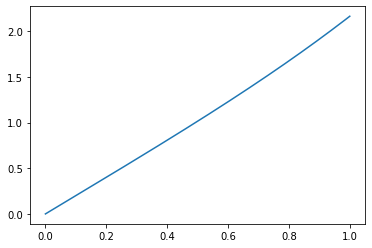

In [50]:
plt.plot(x,y[0])

In [51]:
#Метод трапеций
def trapez(x,y,h,N): 
    trapz = 0 
    for i in range(N-1):
        trapz += (y[0][i+1] + y[0][i])/2
    trapz *= h
    return trapz

In [57]:
delta = trapez(x,y,h,N)-1

In [54]:
def strelok(alpha_max,alpha_min,x,y,h,N,eps,delta):
    alpha = (alpha_max + alpha_min)/2
    while(abs(delta)>eps):
        y[0][0] = 0
        y[1][0] = alpha
        y = solve(x,y,h,N)
        integral = trapez(x,y,h,N)
        delta = integral - 1
        if delta>0:
            alpha_max = alpha
        else:
            alpha_min = alpha
        alpha = (alpha_max + alpha_min)/2
    return alpha

In [63]:
eps = 0.000000001
alpha_0 = strelok(alpha_max,alpha_min,x,y,h,N,eps,delta)

In [66]:
alpha_0

1.9292306546121836

In [62]:
y[0][0] = 0
y[1][0] = alpha_0
y = solve(x,y,h,N)
integral = trapez(x,y,h,N)       
integral

1.0000072998715646

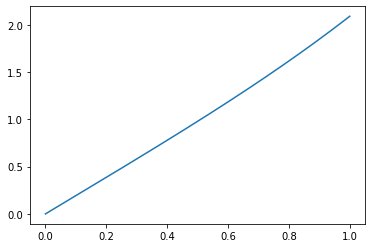

In [65]:
plt.plot(x,y[0])